<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_IBurrington/blob/main/HW8/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook setup and packages installation

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
pl.style.use('seaborn')
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018/

/content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018


In [4]:
lcvs = pd.read_csv('training_set.csv')

In [5]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [6]:
lcvs.shape

(1421705, 6)

In [7]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [8]:
metadata.shape

(7848, 12)

# Extract features

Things Fed wants the time series prepared for the autoencoder to be: 

*   multivariate (6 filters)
*   sparse (measured at irregular intervals)

So I'm assuming that we should not go wild with `groupby` here--we want to feed a time series to the autoencoder, not a bunch of features like we did in HW7. I am maybe overthinking this and actually all I need to do is make a numpy array. 




So on the "irregular intervals"--it does not seem like the objects themselves are measured on regular intervals?

In [9]:
len(lcvs['mjd'].unique())

282504

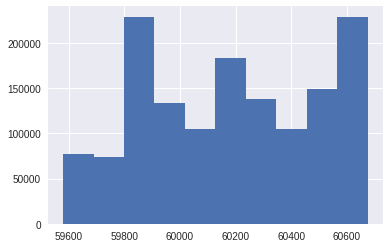

In [10]:
lcvs['mjd'].hist()

Fig. 1: Histogram of all the timestamps in the PLAsTiCC data. There's 282504 unique timestamps in the data--so it seems pretty likely that few objects have identical timestamps. 

OK, so the time series itself doesn't have uniform measurements but maybe the number of observations per object are uniform--object x and object y might be measuring different times, but maybe they all have z observations? 

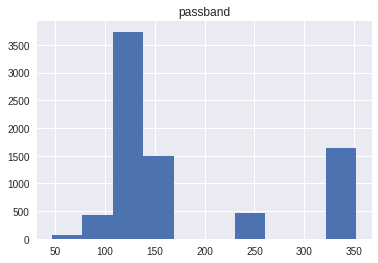

In [11]:
lcvs.groupby(["object_id"])[['passband']].count().hist();

Fig. 2: Histogram of count of observations in each object in the PLAsTiCC data, not broken out by passband. Not especially uniform! Some objects have very few measurements!

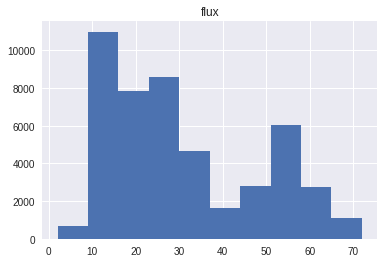

In [12]:
lcvs.groupby(["object_id", "passband"])[['flux']].count().hist();

Fig. 3: A histogram of the number of observations for each object broken out by passband in the PLAsTiCC data, just for good measure.

So I think all we actually need to do here is standardize the data and save it as a numpy array? 

## Standardize features

In [13]:
lcvs['flux'] = (lcvs['flux'] - lcvs['flux'].mean()) / lcvs['flux'].std()

In [14]:
lcvs['flux_err'] = (lcvs['flux_err'] - lcvs['flux'].mean()) / lcvs['flux'].std()

In [23]:
lcvs_np

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-0.154566,3.622952,1
1,615,59750.4306,1,-0.228286,5.553370,1
2,615,59750.4383,3,-0.134638,3.801213,1
3,615,59750.4450,4,-0.112274,11.395031,1
4,615,59752.4070,2,-0.191762,4.041204,1
...,...,...,...,...,...,...
1421700,130779836,60555.9838,4,-0.017525,46.477093,0
1421701,130779836,60560.0459,1,-0.002658,18.947685,0
1421702,130779836,60571.0225,5,0.001603,50.695290,0
1421703,130779836,60585.9974,4,-0.013071,44.819859,0


In [29]:
lcvs_np = lcvs.values

In [30]:
lcvs_np.shape

(1421705, 6)

In [31]:
np.save('lcvs.npy', lcvs_np)

In [21]:
# checking that my file is saved just to be sure!

In [32]:
ls

lcvs.npy  training_set.csv  training_set.csv.zip  training_set_metadata.csv
